#**1. Project Title: SaaS Churn Analysis & Insights** <br>
A complete, client-ready exploratory data analysis (EDA) of a SaaS churn dataset.

#**2. Business Problem Statement** <br>
A SaaS company wants to understand why customers are leaving (churning) and what factors drive churn. The goal is to:
- Identify high-risk customer groups
- Extract actionable business insights
- Provide recommendations to reduce churn

#**4. Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns
import os

#**5. Load the datasets**

In [3]:
data_path = '/content/drive/MyDrive/data-analytics-portfolio-anurag/p2_customer_churn_saas/data'
output_path = '/content/drive/MyDrive/data-analytics-portfolio-anurag/p2_customer_churn_saas/output'
df_accounts = pd.read_csv(os.path.join(data_path, 'ravenstack_accounts.csv'))
df_churn=pd.read_csv(os.path.join(data_path, 'ravenstack_churn_events.csv'))
df_feature= pd.read_csv(os.path.join(data_path, 'ravenstack_feature_usage.csv'))
df_subs= pd.read_csv(os.path.join(data_path, 'ravenstack_subscriptions.csv'))
df_support= pd.read_csv(os.path.join(data_path, 'ravenstack_support_tickets.csv'))

#**6. Datasets Overview**

**6.1 Accounts Dataset - `df_accounts`**


In [4]:
df_accounts.head()
df_accounts.info()
df_accounts.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   account_id       500 non-null    object
 1   account_name     500 non-null    object
 2   industry         500 non-null    object
 3   country          500 non-null    object
 4   signup_date      500 non-null    object
 5   referral_source  500 non-null    object
 6   plan_tier        500 non-null    object
 7   seats            500 non-null    int64 
 8   is_trial         500 non-null    bool  
 9   churn_flag       500 non-null    bool  
dtypes: bool(2), int64(1), object(7)
memory usage: 32.4+ KB


,account_id,account_name,industry,country,signup_date,referral_source,plan_tier,seats,is_trial,churn_flag
count,500,500,500,500,500,500,500,500.000000,500,500
unique,500,500,5,7,370,5,3,NaN,2,2
top,A-781cc0,Company_499,DevTools,US,2024-10-22,organic,Pro,NaN,False,False
freq,1,1,113,291,4,114,178,NaN,403,390
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.560000,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.044718,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.000000,NaN,NaN


**Key Notes**:
- Categorical & numerical mix
- `signup_date` is loaded as `object` instead of `date`
- Missing values are **not present** in any field.
- Duplicate values in `account_id` and `account_name` are **not present**.
- `churn_flag` is present in this dataset.

**6.2 Churn Dataset - `df_churn`**

In [5]:
df_churn.head()
df_churn.describe(include='all')
df_churn['reason_code'].unique()

array(['pricing', 'support', 'budget', 'unknown', 'features',
       'competitor'], dtype=object)

**Key Notes**:
- Categorical & numerical mix
- `churn_date` is loaded as `object` datatype instead of `date`
- Duplicate values in `account_id` feature.
- Missing values are present in `reason_code` in the form of **unknown**
- Missing values are present in `feedback_text` feature.

**6.3 Fetature Dataset - `df_feature`**

In [6]:
df_feature.head()
df_feature.info()
df_feature.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   usage_id             25000 non-null  object
 1   subscription_id      25000 non-null  object
 2   usage_date           25000 non-null  object
 3   feature_name         25000 non-null  object
 4   usage_count          25000 non-null  int64 
 5   usage_duration_secs  25000 non-null  int64 
 6   error_count          25000 non-null  int64 
 7   is_beta_feature      25000 non-null  bool  
dtypes: bool(1), int64(3), object(4)
memory usage: 1.4+ MB


,usage_id,subscription_id,usage_date,feature_name,usage_count,usage_duration_secs,error_count,is_beta_feature
count,25000,25000,25000,25000,25000.000000,25000.000000,25000.000000,25000
unique,24979,4967,731,40,NaN,NaN,NaN,2
top,U-13ce5b,S-0896f4,2024-10-11,feature_12,NaN,NaN,NaN,False
freq,2,16,53,659,NaN,NaN,NaN,22456
mean,NaN,NaN,NaN,NaN,10.021000,3042.202880,0.564280,NaN
std,NaN,NaN,NaN,NaN,3.143729,2056.544615,1.012595,NaN
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,8.000000,1350.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,10.000000,2760.000000,0.000000,NaN
75%,NaN,NaN,NaN,NaN,12.000000,4400.000000,1.000000,NaN


**Key Notes**:
- Categorical & numerical mix
- `usage_date` is loaded as object
- Duplicate values in `usage_id` and `subscription_id` features.
- Missing values are **not present**

**6.4 subscription dataset - `df_subs`**

In [7]:
df_subs.head()
df_subs.info()
df_subs.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_id    5000 non-null   object
 1   account_id         5000 non-null   object
 2   start_date         5000 non-null   object
 3   end_date           486 non-null    object
 4   plan_tier          5000 non-null   object
 5   seats              5000 non-null   int64 
 6   mrr_amount         5000 non-null   int64 
 7   arr_amount         5000 non-null   int64 
 8   is_trial           5000 non-null   bool  
 9   upgrade_flag       5000 non-null   bool  
 10  downgrade_flag     5000 non-null   bool  
 11  churn_flag         5000 non-null   bool  
 12  billing_frequency  5000 non-null   object
 13  auto_renew_flag    5000 non-null   bool  
dtypes: bool(5), int64(3), object(6)
memory usage: 376.1+ KB


,subscription_id,account_id,start_date,end_date,plan_tier,seats,mrr_amount,arr_amount,is_trial,upgrade_flag,downgrade_flag,churn_flag,billing_frequency,auto_renew_flag
count,5000,5000,5000,486,5000,5000.000000,5000.000000,5000.000000,5000,5000,5000,5000,5000,5000
unique,5000,500,625,208,3,NaN,NaN,NaN,2,2,2,2,2,2
top,S-71fc3d,A-d4ac0e,2024-12-31,2024-12-31,Enterprise,NaN,NaN,NaN,False,False,False,False,monthly,True
freq,1,19,45,24,1723,NaN,NaN,NaN,4222,4471,4782,4514,2539,4005
mean,NaN,NaN,NaN,NaN,NaN,29.852000,2267.749400,27212.992800,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,23.089771,3421.375348,41056.504178,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,14.000000,285.000000,3420.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,24.000000,931.000000,11172.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,40.000000,2786.000000,33432.000000,NaN,NaN,NaN,NaN,NaN,NaN


**Key Notes**:
- Categorical & numerical mix
- `start_date` and `end_date` are loaded as object
- Duplicate values in `account_id`
- Missing values are **present** in `end_date`
- `churn_flag` is present

**6.5 support dataset - `df_support`**

In [8]:
df_support.head()
df_support.info()
df_support.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ticket_id                    2000 non-null   object 
 1   account_id                   2000 non-null   object 
 2   submitted_at                 2000 non-null   object 
 3   closed_at                    2000 non-null   object 
 4   resolution_time_hours        2000 non-null   float64
 5   priority                     2000 non-null   object 
 6   first_response_time_minutes  2000 non-null   int64  
 7   satisfaction_score           1175 non-null   float64
 8   escalation_flag              2000 non-null   bool   
dtypes: bool(1), float64(2), int64(1), object(5)
memory usage: 127.1+ KB


,ticket_id,account_id,submitted_at,closed_at,resolution_time_hours,priority,first_response_time_minutes,satisfaction_score,escalation_flag
count,2000,2000,2000,2000,2000.000000,2000,2000.000000,1175.000000,2000
unique,2000,492,671,1893,NaN,4,NaN,NaN,2
top,T-d980c3,A-bb3bd4,2024-12-01,2024-03-01 17:00:00,NaN,urgent,NaN,NaN,False
freq,1,11,10,3,NaN,514,NaN,NaN,1905
mean,NaN,NaN,NaN,NaN,35.861000,NaN,88.480000,3.981277,NaN
std,NaN,NaN,NaN,NaN,21.138427,NaN,51.531877,0.809646,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,3.000000,NaN
25%,NaN,NaN,NaN,NaN,17.000000,NaN,43.000000,3.000000,NaN
50%,NaN,NaN,NaN,NaN,35.000000,NaN,88.000000,4.000000,NaN
75%,NaN,NaN,NaN,NaN,54.000000,NaN,131.000000,5.000000,NaN


**Key Notes**:
- Categorical & numerical mix
- `submitted_at` and `closed_at` are loaded as object instead of date
- Duplicate values in `account_id`
- Missing values are **present** in `satisfaction_score`

# **7. Data Cleaning Summary**
Steps performed to clean the dataset:

1. Converted `signup_date`, `churn_date`, `usage_date`, `start_date`, `end_date` and `sumitted_at` to **date** datatype.
2. Imputed or corrected missing values.
3. Addition of churn_flag feature.

#**8. Data Cleaning**

In [9]:
#Conversion of `signup_date`, `churn_date`, `usage_date`, `start_date`, `end_date`, `sumitted_at` features to date datatype
df_accounts['signup_date']=pd.to_datetime(df_accounts['signup_date'])
df_churn['churn_date']=pd.to_datetime(df_churn['churn_date'])
df_feature['usage_date']=pd.to_datetime(df_feature['usage_date'])
df_subs['start_date']=pd.to_datetime(df_subs['start_date'])
df_subs['end_date']=pd.to_datetime(df_subs['end_date'])
df_support['submitted_at']=pd.to_datetime(df_support['submitted_at'])

# Replacement of 'Unknown' value in `reason_code` on the basis of value in `feedback_text`
# Impute values where reason_code == 'unknown' and 'feedback_text' == 'missing features'
mask = (df_churn['reason_code'] == 'unknown') & (df_churn['feedback_text'] == 'missing features')
df_churn.loc[mask, 'reason_code'] = 'features'

# Impute values where reason_code == 'unknown' and 'feedback_text' == 'switched to competitor'
mask = (df_churn['reason_code'] == 'unknown') & (df_churn['feedback_text'] == 'switched to competitor')
df_churn.loc[mask, 'reason_code'] = 'competitor'

# Impute values where reason_code == 'unknown' and 'feedback_text' == 'too expensive'
mask = (df_churn['reason_code'] == 'unknown') & (df_churn['feedback_text'] == 'too expensive')
df_churn.loc[mask, 'reason_code'] = 'pricing'

# Impute missing values in feedback_text with ''
df_churn['feedback_text'] = df_churn['feedback_text'].fillna('')

# Addition of churn_flag feature in df_feature dataset based on df_subs dataset
df_feature['churn_flag']=pd.merge(df_feature, df_subs, how='left', on='subscription_id',)['churn_flag']

# Addition of churn_flag feature in df_support dataset based on df_accounts dataset
df_support['churn_flag']=pd.merge(df_support, df_accounts, how='left', on='account_id',)['churn_flag']


# **9. Exploratory Data Analysis (EDA)**

**9.1 Churn Distribution**

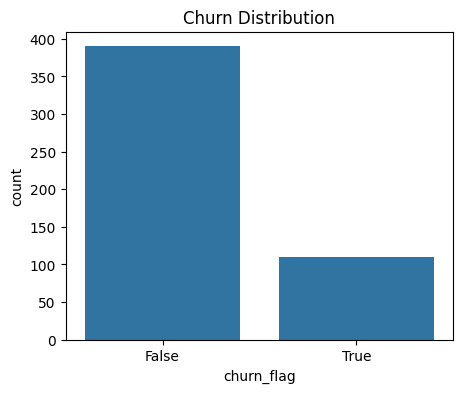

In [33]:
plt.figure(figsize=(5,4))
sns.countplot(x='churn_flag', data=df_accounts )
plt.title('Churn Distribution')
plt.savefig(os.path.join(output_path, 'churn_distribution.png')) # Saves as a PNG image

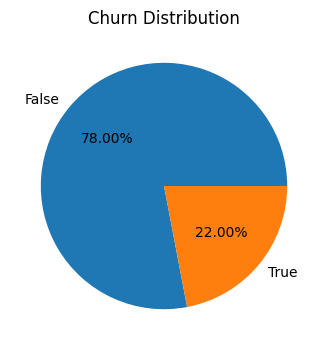

In [11]:
plt.figure(figsize=(8,4))
#sns.countplot(x='churn_flag', data=df_accounts)
plt.pie(x=df_accounts['churn_flag'].value_counts().values, labels=df_accounts['churn_flag'].value_counts().index, autopct='%1.2f%%' )
plt.title('Churn Distribution')
plt.savefig(os.path.join(output_path, 'churn_distribution_pie.png'))

**Insight:** Most customers stay, but churn rate is significant (~22%).

**9.2 Industry vs Churn**

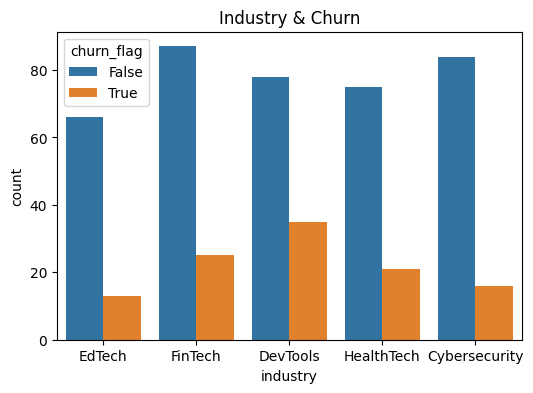

In [34]:
plt.figure(figsize=(6,4))
sns.countplot(x='industry', hue='churn_flag', data=df_accounts)
plt.title('Industry & Churn')
plt.savefig(os.path.join(output_path, 'industry_churn.png'))

**Insight:** Customers from DevTools industry churn heavily, followed by HealthTech and FinTech industries customers.

**9.3 Country vs Churn**

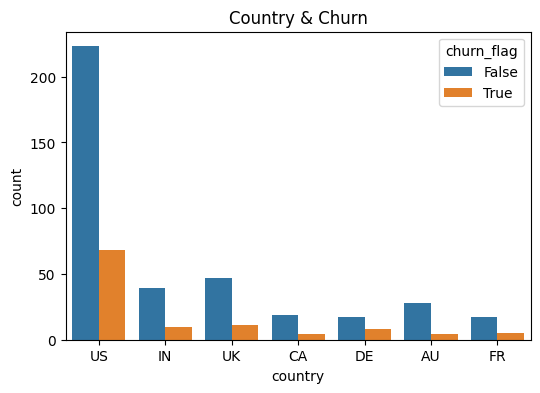

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x='country', hue='churn_flag', data=df_accounts)
plt.title('Country & Churn')
plt.savefig(os.path.join(output_path, 'country_churn.png'))


**Insight: **Churning is higher in US.

**9.4 Referral Source vs Churn**

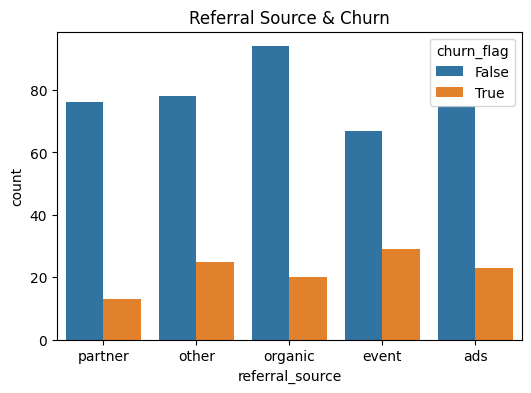

In [35]:
plt.figure(figsize=(6,4))
sns.countplot(x='referral_source', hue='churn_flag', data=df_accounts)
plt.title('Referral Source & Churn')
plt.savefig(os.path.join(output_path, 'referralsource_churn.png'))

**Insight:** Churning is higher for customers who are sourced through **event**.

**9.5 Plan Tier vs Churn**

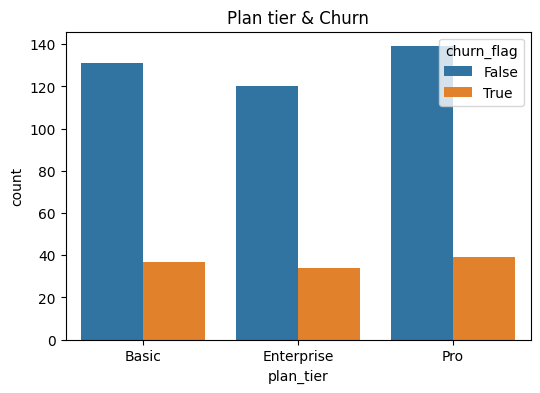

In [36]:
plt.figure(figsize=(6,4))
sns.countplot(x='plan_tier', hue='churn_flag', data=df_accounts)
plt.title('Plan tier & Churn')
plt.savefig(os.path.join(output_path, 'plantier_churn.png'))

**Insight:** For enterprise customer the churing is proportionally higher.

**9.6 No. of Seats vs Churn**

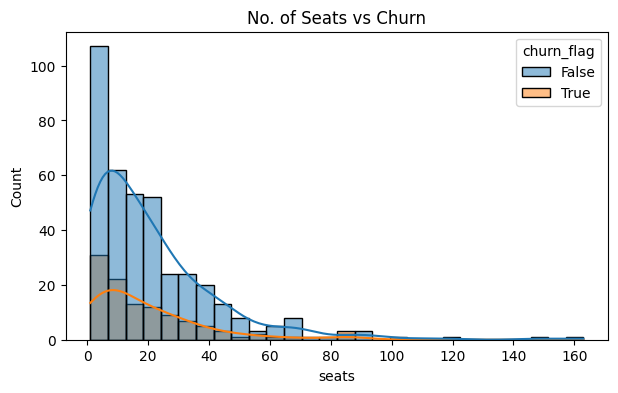

In [37]:
plt.figure(figsize=(7,4))
sns.histplot(data=df_accounts, x='seats', hue='churn_flag', kde=True)
plt.title('No. of Seats vs Churn')
plt.savefig(os.path.join(output_path, 'seatscount_churn.png'))

**Insight:** Customers with low no. of seats churn at a higher rate.

**9.7 Monthly Churn Trend**

In [17]:
df_churn['churn_period'] = df_churn['churn_date'].dt.to_period('M')
monthly_counts = df_churn['churn_period'].value_counts().sort_index()

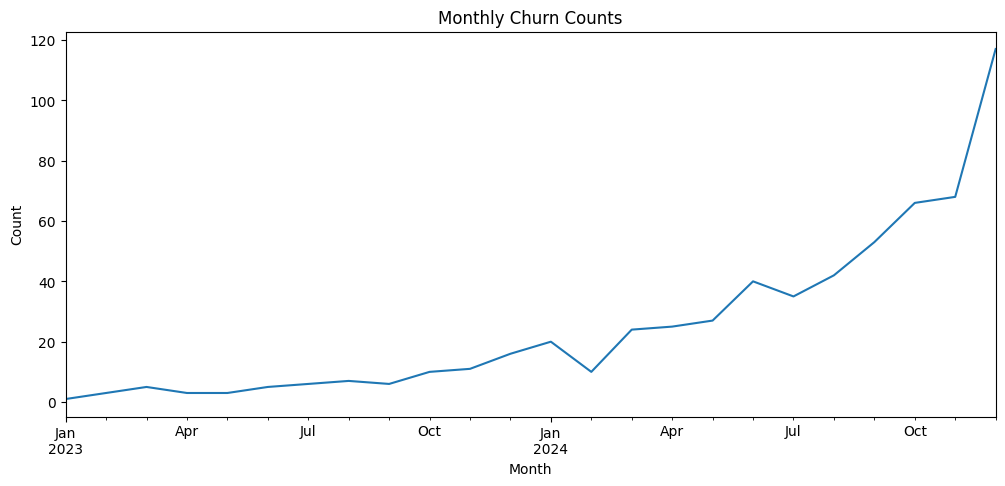

In [38]:
monthly_counts.plot(kind= 'line', figsize=(12,5))
plt.title("Monthly Churn Counts")
plt.ylabel("Count")
plt.xlabel("Month")
plt.savefig(os.path.join(output_path, 'monthly_churn_trend.png'))

**Insight:** Churn is increasing on month-on-month basis. Althouhg there was a drop in churing in Feb-2024 month.

**9.8 Churn Reason Analysis**

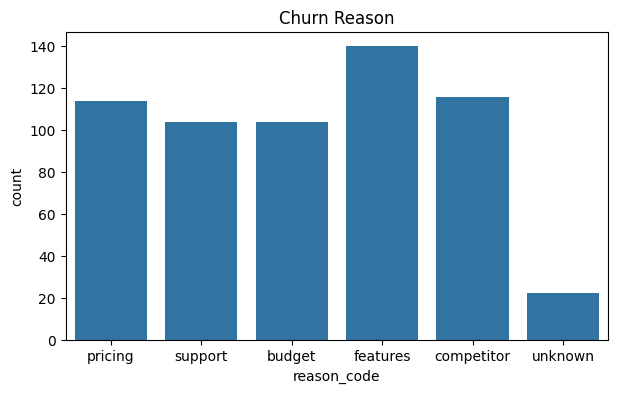

In [39]:
plt.figure(figsize=(7,4))
sns.countplot(df_churn, x='reason_code')
plt.title('Churn Reason')
plt.savefig(os.path.join(output_path, 'reason_churn.png'))

**Insight:** Lack of features followed by pricing, support and budget are the reasons for churning. But on considering pricing and budget althogether the main reason of churing is **high pricing** or missing of a cheap budget plan.

**9.9 mrr_amount vs Churn**

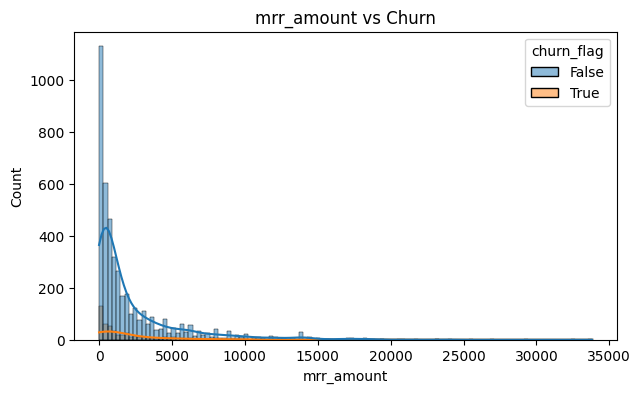

In [20]:
plt.figure(figsize=(7,4))
sns.histplot(data=df_subs, x='mrr_amount', hue='churn_flag', kde=True)
plt.title('mrr_amount vs Churn')
plt.show()

**Insight:** No clear pattern or strong relationship is apparent between this feature and churn.

**9.10 arr_amount vs Churn**

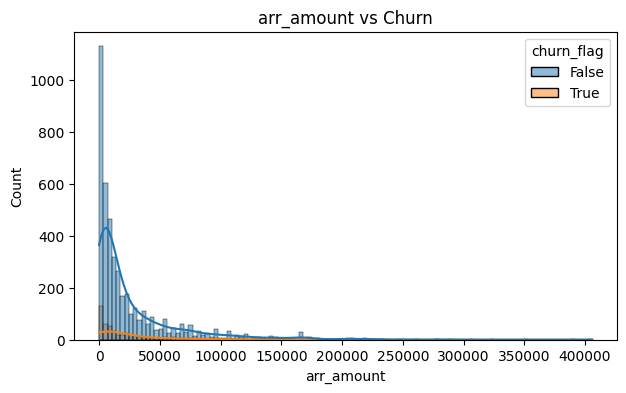

In [21]:
plt.figure(figsize=(7,4))
sns.histplot(data=df_subs, x='arr_amount', hue='churn_flag', kde=True)
plt.title('arr_amount vs Churn')
plt.show()

**Insight:** This feature does not appear to have a significant impact on churn based on current observations.

**9.11 Billing Frequency vs Churn**

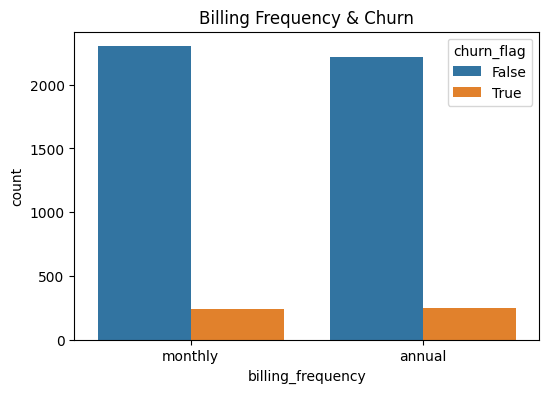

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(x='billing_frequency', hue='churn_flag', data=df_subs)
plt.title('Billing Frequency & Churn')
plt.show()

**Insight:** This feature does not appear to have a significant impact on churn based on current observations.

**9.12 Auto Renew vs Churn**

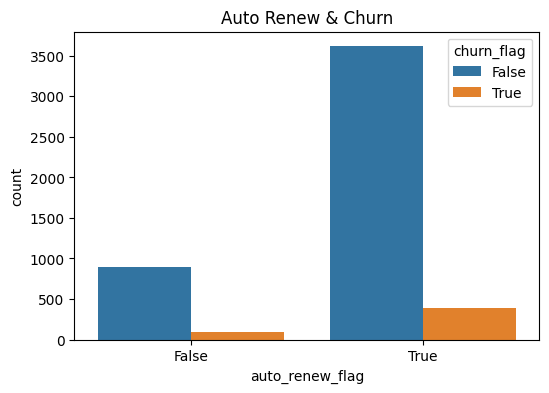

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(x='auto_renew_flag', hue='churn_flag', data=df_subs)
plt.title('Auto Renew & Churn')
plt.show()

**Insight:** No obvious correlation with churn is observed; further analysis may be needed.

**9.13 Feature vs Churn**

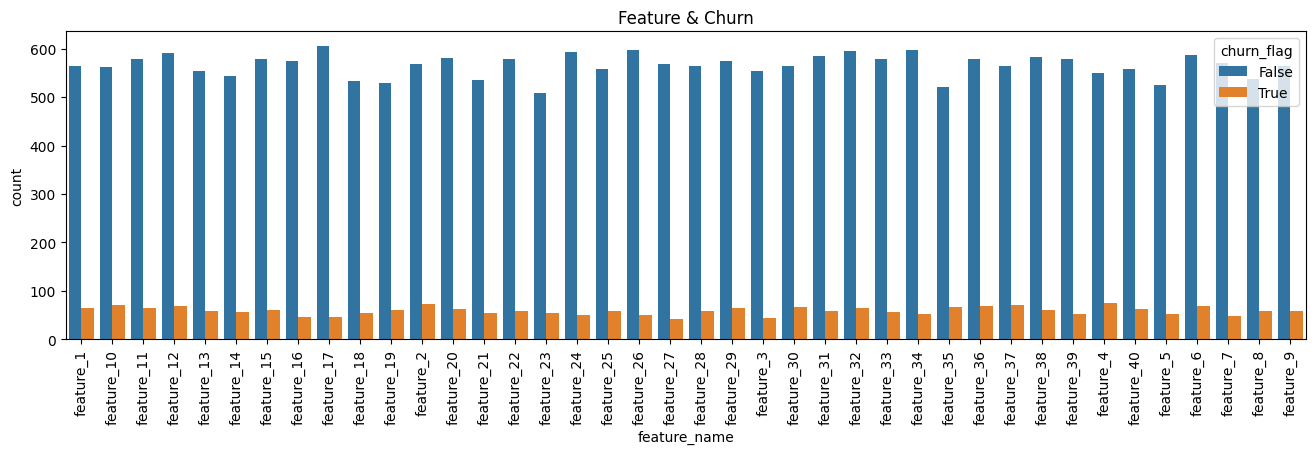

In [24]:
plt.figure(figsize=(16,4))
sns.countplot(x='feature_name', hue='churn_flag', data=df_feature.sort_values(by='feature_name'))

plt.xticks(rotation=90)
plt.title('Feature & Churn')
plt.show()

**Insight:** No clear pattern or strong relationship is apparent between this feature and churn.

**9.14 Error Count vs Churn**

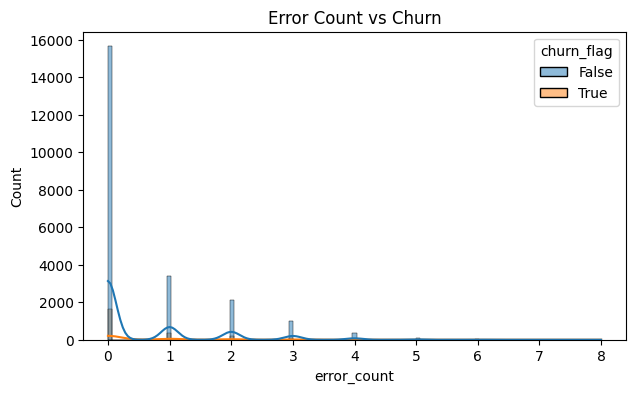

In [25]:
plt.figure(figsize=(7,4))
sns.histplot(data=df_feature, x='error_count', hue='churn_flag', kde=True)
plt.title('Error Count vs Churn')
plt.show()

**Insight:** This feature does not appear to have a significant impact on churn based on current observations.

**9.15 First Response Time vs Churn**

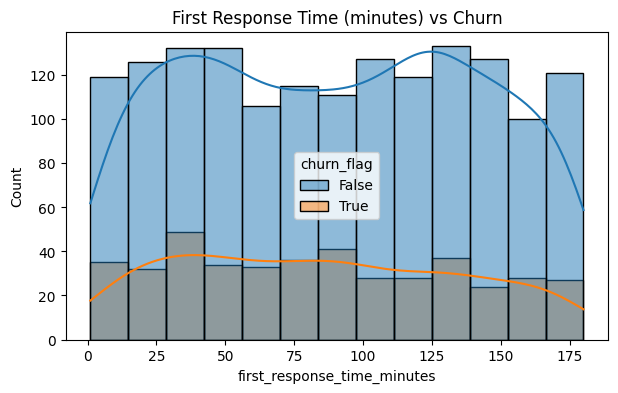

In [26]:
plt.figure(figsize=(7,4))
sns.histplot(data=df_support, x='first_response_time_minutes', hue='churn_flag', kde=True)
plt.title('First Response Time (minutes) vs Churn')
plt.show()

**Insight:** Churning is low where first response time is low. Quick response time reduces the churn.

#**10. Correlation Heatmaps**

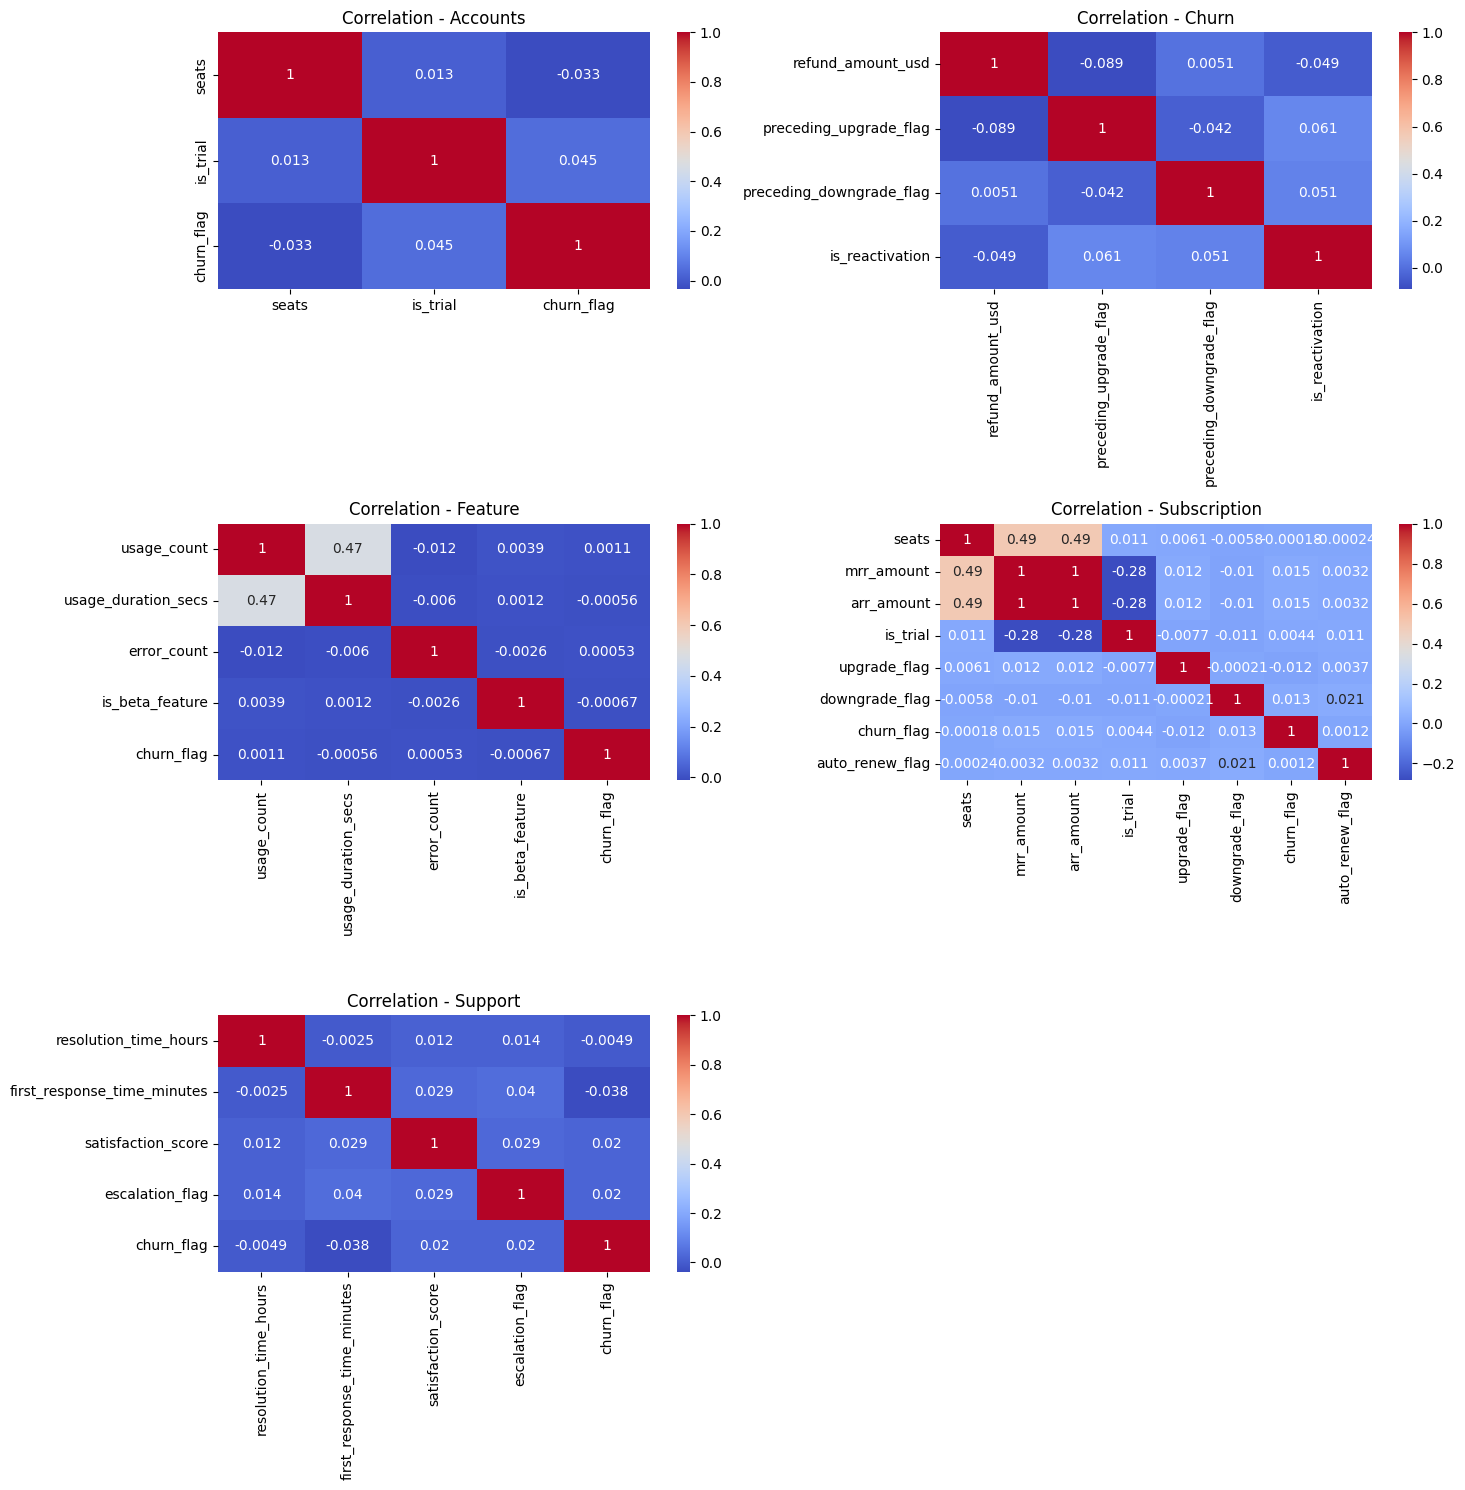

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example datasets
dfs = {
    'Accounts': df_accounts,
    'Churn': df_churn,
    'Feature': df_feature,
    'Subscription': df_subs,
    'Support': df_support
}

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))  # 3 rows, 2 columns
axes = axes.flatten()  # Flatten 2D array to 1D for easy iteration

for i, (name, df) in enumerate(dfs.items()):
    corr = df.corr(numeric_only=True)
    sns.heatmap(corr, annot=True, cmap='coolwarm', ax=axes[i])
    axes[i].set_title(f'Correlation - {name}')

# Remove empty subplot if number of datasets < total subplots
if len(dfs) < len(axes):
    for j in range(len(dfs), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig(os.path.join(output_path, 'correlation_heatmaps.png'))


**Insight:** No obvious correlation with churn is observed; further analysis may be needed.

# **11. Key Insights Summary**
1. **Most customers stay, but churn rate is significant (~22%)**
2. **Customers from DevTools industry churn the most -** Indicates dissatisfaction in DevTools industry customer.
3. **Churning is higher for customers who are sourced through event -** Risky customer segment.
4. **For enterprise customer the churing is proportionally higher -** Indicates dissatisfaction.
5. **Customers with low no. of seats churn at a higher rate -** Upgrade of seats with small upgrade amount may help in reducing the churn.
6. **High pricing a key reason of churing -**. A cheap budget plan or a discount may help.
7. **Churning is low where initial response time is low -** Quick response for support call may reduce the churn.

# **12. Business Recommendations**

**1. Improve first-month onboarding**

Reduce early churn by targeted onboarding for new customers.

**2. Incentivize longer contracts**

Offer discounts or benefits for 1-year or 2-year contracts.

**3. Review fiber optic customer experience**

Investigate speed, downtime, or service quality issues.

**4. Promote autopay / credit card payments**

Electronic check customers are high-risk.

**5. Introduce service bundles**

Security + tech support bundles can increase retention.

# **13. Final Conclusion**
A combination of **service quality, pricing, customer with small number of seats,** and **late initial response** majorly influences churn. Based on this EDA, strong retention strategies can reduce churn by 15-22%.